In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import house_price_predictor
import importlib

importlib.reload(house_price_predictor)
from house_price_predictor import house_price_predictor
data = pd.read_csv('./housing_price_dataset.csv')
data2 = pd.read_csv('./Housing_Price_Data.csv')
data2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [28]:
model.linear_regression()

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

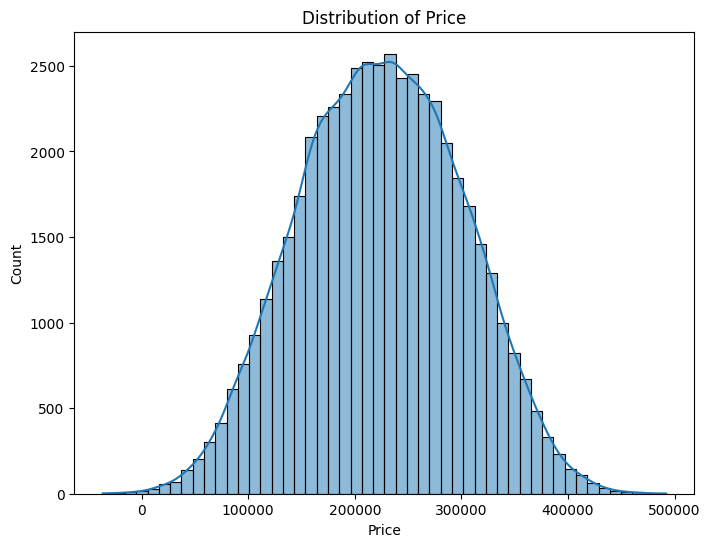

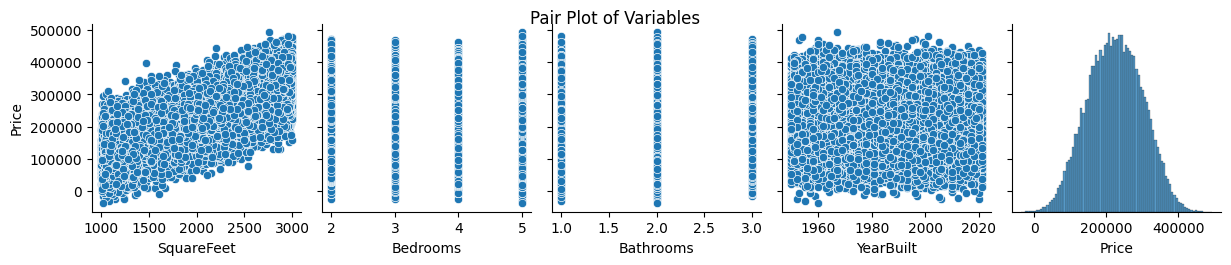

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()


sns.pairplot(data,y_vars='Price')
plt.suptitle('Pair Plot of Variables', y=1.02) # Adjust title position
plt.show()

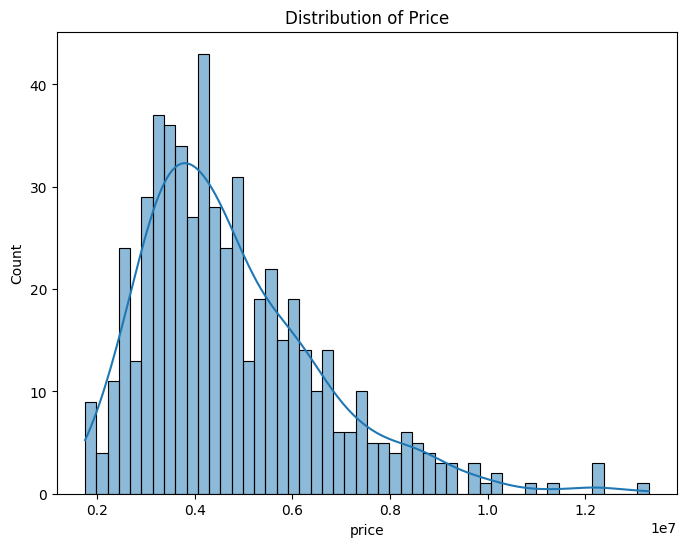

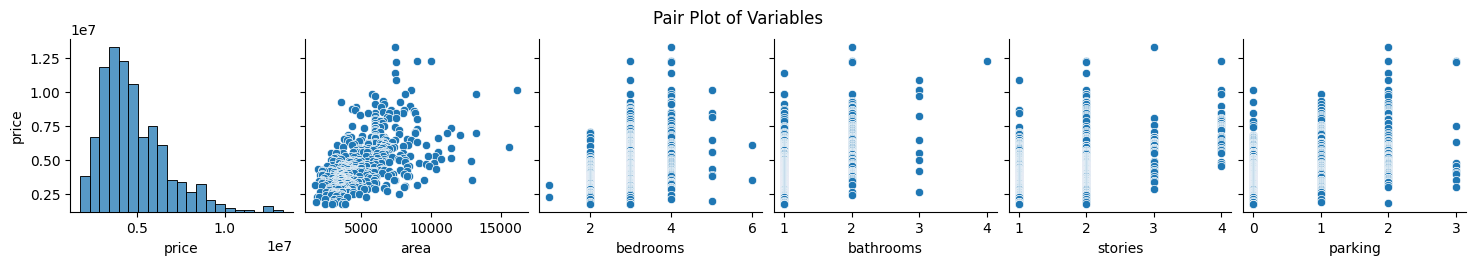

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data2['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()


sns.pairplot(data2,y_vars='price')
plt.suptitle('Pair Plot of Variables', y=1.02) # Adjust title position
plt.show()

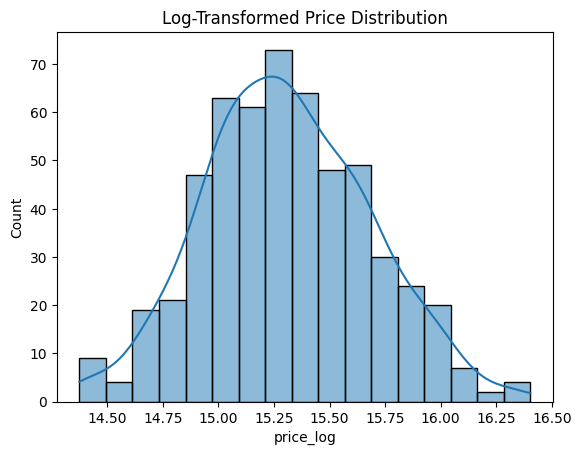

In [9]:
data2['price_log'] = np.log1p(data2['price'])

sns.histplot(data2['price_log'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.show()

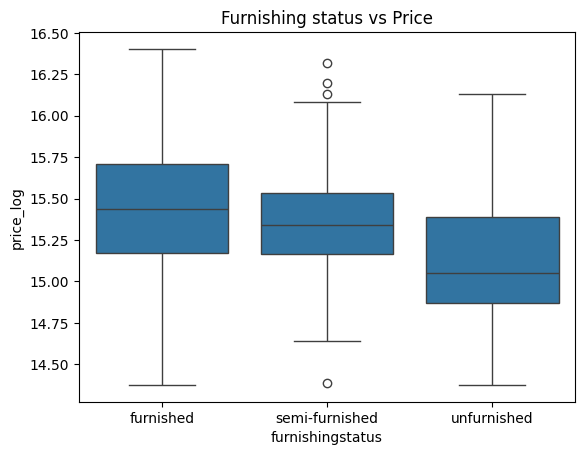

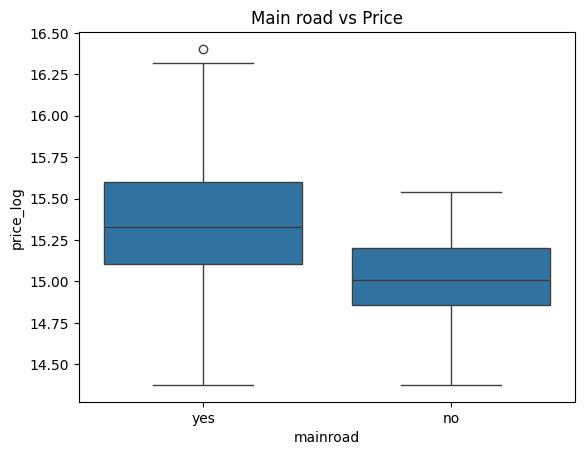

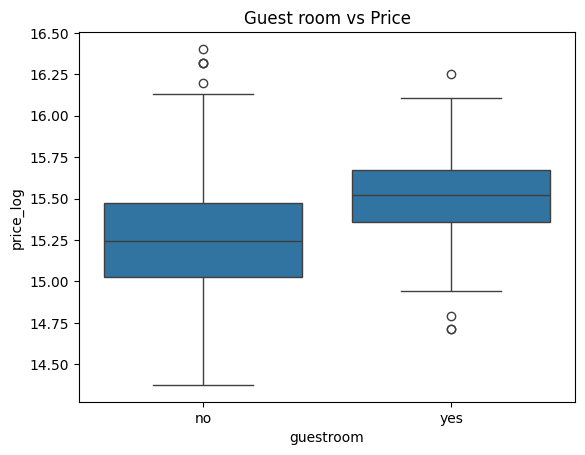

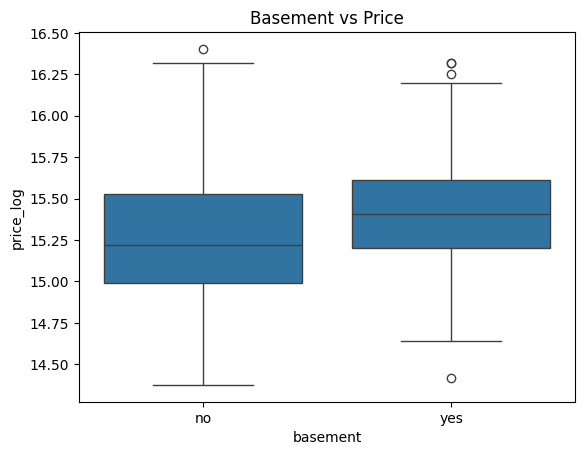

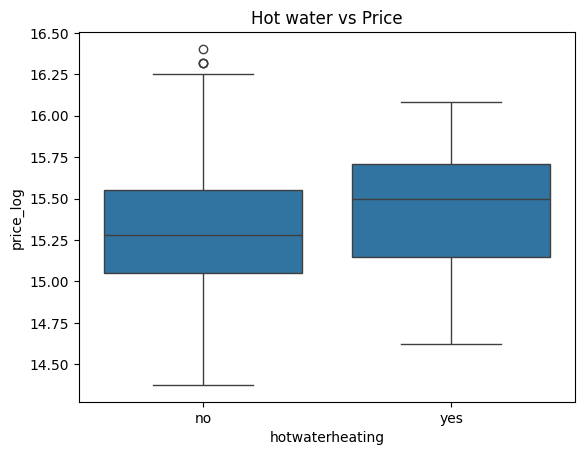

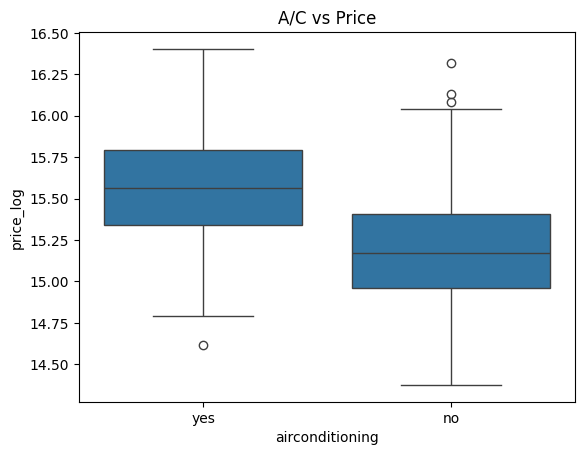

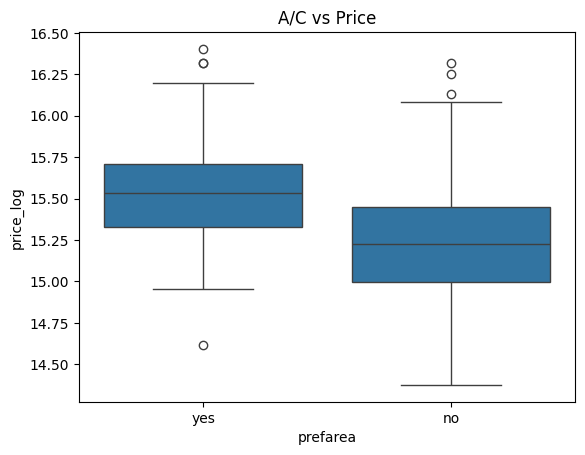

In [10]:
sns.boxplot(x='furnishingstatus', y='price_log', data=data2) # Overall quality
plt.title('Furnishing status vs Price')
plt.show()

sns.boxplot(x='mainroad', y='price_log', data=data2) # Overall quality
plt.title('Main road vs Price')
plt.show()

sns.boxplot(x='guestroom', y='price_log', data=data2) # Overall quality
plt.title('Guest room vs Price')
plt.show()

sns.boxplot(x='basement', y='price_log', data=data2) # Overall quality
plt.title('Basement vs Price')
plt.show()

sns.boxplot(x='hotwaterheating', y='price_log', data=data2) # Overall quality
plt.title('Hot water vs Price')
plt.show()

sns.boxplot(x='airconditioning', y='price_log', data=data2) # Overall quality
plt.title('A/C vs Price')
plt.show()

sns.boxplot(x='prefarea', y='price_log', data=data2) # Overall quality
plt.title('A/C vs Price')
plt.show()

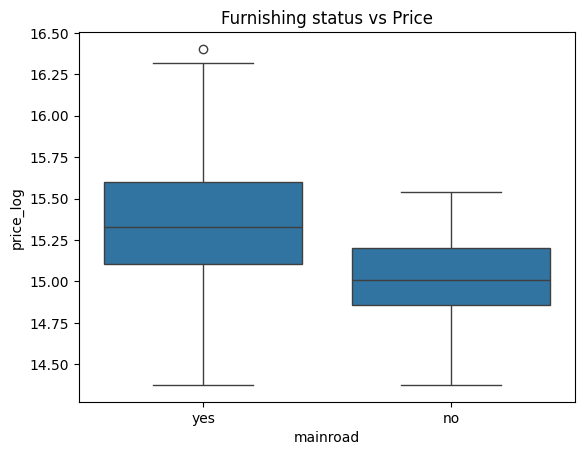

In [11]:
sns.boxplot(x='mainroad', y='price_log', data=data2) # Overall quality
plt.title('Furnishing status vs Price')
plt.show()

In [17]:
# Linear regression for both datasets
linear_regression_model_for_data1 = house_price_predictor(data, "Price", True)
linear_regression_model_for_data2 = house_price_predictor(data2, "price", True)
linear_regression_model_for_data1.linear_regression()
linear_regression_model_for_data2.linear_regression()

Removing outliers...
Removed 35 outliers.
Removing outliers...
Removed 6 outliers.
R² Score: 0.5717944574479832
RMSE: 50032.98905027905
R² Score: 0.7235437704537412
RMSE: 1029632.3355160061


In [21]:
linear_regression_model_for_data1.calculate_errors()
print("========")
linear_regression_model_for_data2.calculate_errors()

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [14]:
#Better Data Prep

data_encoded2 = pd.get_dummies(data2,drop_first=True)
data_encoded2['mainroad_yes'] = data_encoded2['mainroad_yes'].replace({True: 1, False: 0})
data_encoded2['guestroom_yes'] = data_encoded2['guestroom_yes'].replace({True: 1, False: 0})
data_encoded2['basement_yes'] = data_encoded2['basement_yes'].replace({True: 1, False: 0})
data_encoded2['hotwaterheating_yes'] = data_encoded2['hotwaterheating_yes'].replace({True: 1, False: 0})
data_encoded2['airconditioning_yes'] = data_encoded2['airconditioning_yes'].replace({True: 1, False: 0})
data_encoded2['prefarea_yes'] = data_encoded2['prefarea_yes'].replace({True: 1, False: 0})
data_encoded2['furnishingstatus_unfurnished'] = data_encoded2['furnishingstatus_unfurnished'].replace({True: 1, False: 0})
data_encoded2['furnishingstatus_semi-furnished'] = data_encoded2['furnishingstatus_semi-furnished'].replace({True: 1, False: 0})
print(data_encoded2)

X = data_encoded2[['area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','parking','prefarea_yes','furnishingstatus_unfurnished','furnishingstatus_semi-furnished']]
y = data_encoded2[['price_log']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        price  area  bedrooms  bathrooms  stories  parking  price_log  \
0    13300000  7420         4          2        3        2  16.403275   
1    12250000  8960         4          4        4        3  16.321037   
2    12250000  9960         3          2        2        2  16.321037   
3    12215000  7500         4          2        2        3  16.318175   
4    11410000  7420         4          1        2        2  16.250001   
..        ...   ...       ...        ...      ...      ...        ...   
540   1820000  3000         2          1        1        2  14.414348   
541   1767150  2400         3          1        1        0  14.384879   
542   1750000  3620         2          1        1        0  14.375127   
543   1750000  2910         3          1        1        0  14.375127   
544   1750000  3850         3          1        2        0  14.375127   

     mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0               1              0             0      

/var/folders/m3/yhqf_rg158d7jdcrcjmhp07h0000gn/T/ipykernel_9029/940677136.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded2['mainroad_yes'] = data_encoded2['mainroad_yes'].replace({True: 1, False: 0})
/var/folders/m3/yhqf_rg158d7jdcrcjmhp07h0000gn/T/ipykernel_9029/940677136.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded2['guestroom_yes'] = data_encoded2['guestroom_yes'].replace({True: 1, False: 0})
/var/folders/m3/yhqf_rg158d7jdcrcjmhp07h0000gn/T/ipykernel_9029/940677136.py:6: FutureWarning: Downc

In [15]:
#Linear Regression
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2 = r2_score(y_test,predictions)

n = len(y_test)
p = np.sum(model.coef_ != 0)
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(r2)
print(adj_r2)

0.67220474165014
0.6233841712576076


In [19]:
#lasso cv
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# model = LassoCV(cv=5, n_jobs=-1) # n_jobs=-1 uses all available CPU cores
# model.fit(X_train_scaled, y_train)
# optimal_alpha = model.alpha_
# print(f"The optimal alpha value is: {optimal_alpha}")
# score = model.score(X_test_scaled, y_test)
# print(f"R-squared score on test set: {score}")
# print(f"Coefficients: {model.coef_}")
linear_regression_model_for_data1 = house_price_predictor(data, "Price", True)
linear_regression_model_for_data1.LassoCV()
print("=====")
linear_regression_model_for_data2 = house_price_predictor(data2, "price", True)
linear_regression_model_for_data2.LassoCV()

Removing outliers...
Removed 35 outliers.
Optimal Alpha: 0.0007503529292847133
R² (test): 0.5717637263329344
Coefficients: [ 0.75017497  0.07359332  0.029203   -0.00208299 -0.0038176   0.00764846]
=====
Removing outliers...
Removed 6 outliers.
Optimal Alpha: 0.01183266522703999
R² (test): 0.7173036637718093
Coefficients: [ 0.29156336  0.02961695  0.26830849  0.21713514  0.08242976  0.08855647
  0.09588445  0.06335142  0.08088061  0.22192302  0.1446597  -0.
 -0.08270864]


In [20]:
#Lasso regression 

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# lasso_model = Lasso(alpha=0.001)
# lasso_model.fit(X_train_scaled, y_train)

# y_pred = lasso_model.predict(X_test_scaled)

# mse = mean_squared_error(y_test, y_pred)

# r2 = r2_score(y_test,y_pred)
# print(f"Coefficients: {lasso_model.coef_}")

# n = len(y_test)
# p = np.sum(lasso_model.coef_ != 0)

# adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
# print(r2)
# print(adj_r2)
linear_regression_model_for_data1 = house_price_predictor(data, "Price", True)
linear_regression_model_for_data1.LassoRegression()
print("===")
linear_regression_model_for_data2 = house_price_predictor(data2, "price", True)
linear_regression_model_for_data2.LassoRegression()

Removing outliers...
Removed 35 outliers.
R²: 0.5717944569579525
Adjusted R²: 0.5715371734351954
Coefficients: [56891.2118112   5633.15176523  2269.60642264  -214.50803505
  -325.72541845   617.3465287 ]
===
Removing outliers...
Removed 6 outliers.
R²: 0.7235437701912382
Adjusted R²: 0.6853104618134307
Coefficients: [ 483312.42404974   55593.52010494  444929.62462037  366214.59886335
  142390.97001158  153315.85090636  162293.83001023  116392.66099962
  154343.99860663  370803.18048396  246838.59776968  -45353.62151256
 -173028.28716765]


In [18]:
# X_train_f = X_train[['area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','parking','prefarea_yes','furnishingstatus_unfurnished']]
# X_test_f = X_test[['area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','parking','prefarea_yes','furnishingstatus_unfurnished']]

# model = LinearRegression()

# model.fit(X_train_f, y_train)

# predictions = model.predict(X_test_f)

# r2 = r2_score(y_test,predictions)

# n = len(y_test)
# p = np.sum(model.coef_ != 0)

# adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# print(r2)
# print(adj_r2)